**№17.152**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Задаем заданную функцию (orig_f) и ее градиент (grad)

In [7]:
def orig_f(x1,x2):
    return x1 ** 2 + 3 * x2 ** 2 + np.cos(x1 + x2)

def grad(x1, x2):
    return np.array([2 * x1 - np.sin(x1 + x2), 6 * x2 - np.sin(x1 + x2)])

In [8]:
def f(x1_0, x2_0, x1_h0, x2_h0, a):
    return (x1_0 + a * x1_h0) ** 2 + 3 * (x2_0 + a * x2_h0) ** 2 + np.cos((x1_0 + a * x1_h0)  + (x2_0 + a * x2_h0))

def fa(a):
    return f(x1_0, x2_0, x1_h0, x2_h0, a)

def df(x1_0, x2_0, x1_h0, x2_h0, a):  
    return 2 * x1_h0 * (x1_0 + a * x1_h0) + 6 * x2_h0 * (x2_0 + a * x2_h0) - (x1_h0 + x2_h0) * np.sin((x1_0 + a * x1_h0) +(x2_0 + a * x2_h0))

def dfa(a):
    return df(x1_0, x2_0, x1_h0, x2_h0, a)

Задаем функцию для поиска альфы(находим так же как в предыдущем номере)

In [12]:
def alpha(a, b):
        while abs(b - a) > 1e-3:
            if dfa(a) >= 0:
                return a
            elif dfa(b) <= 0:
                return b

            else:
                c = (fa(a) - fa(b) + b * dfa(b) - a * dfa(a)) / (dfa(b) - dfa(a))

                if dfa(c) > 0:
                    b = c
                else:
                    a = c      
        return c

Немного теории

![avatar](https://sun9-6.userapi.com/impg/ES1qK0fZG7EtirCBvRH02Q7GrlKxXXjYrLrp_g/28SUeDGkksw.jpg?size=789x530&quality=96&sign=5b2ad45b32aabdc9447364ca61442eae&type=album)

In [19]:
x1_0, x2_0 = -np.pi/4, np.pi/6
x1_h0, x2_h0 = -grad(x1_0, x2_0)
iter = 0 # количество итераций

t = [] # список с координатами точек
t.append([x1_0, x2_0])

In [20]:
while np.sqrt(grad(x1_0, x2_0)[0] ** 2 + grad(x1_0, x2_0)[1] ** 2) > 1e-3:
    iter += 1
    if iter % 2 == 0:
        a = alpha(a = 0, b = 1)

        x1_1 = x1_0 + a * x1_h0
        x2_1 = x2_0 + a * x2_h0

        x1_h1 = -grad(x1_1, x2_1)[0]
        x2_h1 = -grad(x1_1, x2_1)[1]

    else:
        a = alpha(a = 0, b = 1)

        x1_1 = x1_0 + a * x1_h0
        x2_1 = x2_0 + a * x2_h0

        bk_ch = grad(x1_1, x2_1)[0] ** 2 + grad(x1_1, x2_1)[1] ** 2
        bk_z = grad(x1_0, x2_0)[0] ** 2 + grad(x1_0, x2_0)[1] ** 2
        bk = bk_ch / bk_z

        x1_h0 = -grad(x1_1, x2_1)[0] + x1_h0 * bk
        x2_h1 = -grad(x1_1, x2_1)[1] + x2_h0 * bk

    x1_0 = x1_1
    x2_0 = x2_1
    t.append([x1_0, x2_0])

    x1_h0 = x1_h0
    x2_h0 = x2_h1

Графики

Text(0.5, 0, 'x2')

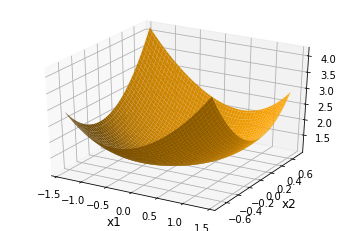

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x = list(np.linspace(-1.4, 1.4, 100))
y = list(np.linspace(-0.7, 0.7, 100))
x, y = np.meshgrid(x, y)
z = orig_f(x, y)

a = ax.plot_surface(x, y, z, color='orange')
ax.set_xlabel('x1', fontsize = 12)
ax.set_ylabel('x2', fontsize = 12)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
x = list(np.linspace(-1, 1, 100))
y = list(np.linspace(-0.6, 0.6, 100))
x, y = np.meshgrid(x, y)
z = function(x, y)
t = np.matrix(t)
ax.plot(t[:,0], t[:,1], '-*')
ax.contourf(x, y, z, 20)

ax.set_xlabel('x1')
ax.set_ylabel('x2')

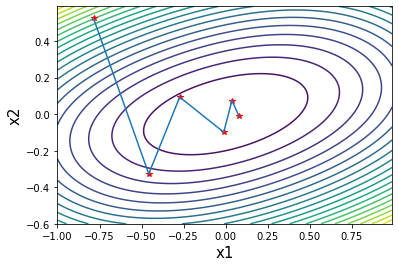